In [5]:
from fastai.vision.all import *

In [9]:
path = Path('Corals')

In [10]:
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = RandomResizedCrop(224, min_scale = 0.5),
    batch_tfms = aug_transforms()).dataloaders(path)

/home/aryamik/anaconda3/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


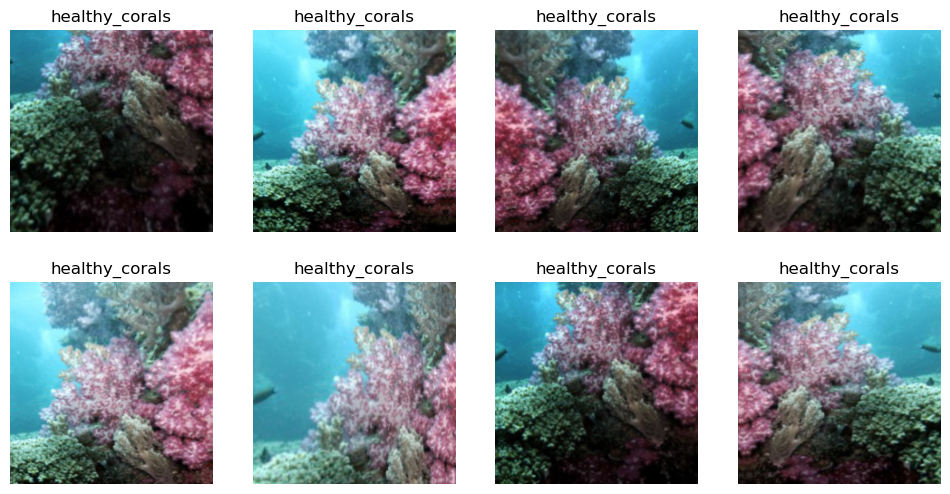

In [11]:
dls.train.show_batch(max_n = 8, unique = True)

In [14]:
learn = vision_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.136140,0.936547,0.326087,02:17


epoch,train_loss,valid_loss,error_rate,time
0,0.778637,0.585958,0.233696,03:48
1,0.712437,0.774049,0.228261,02:42
2,0.642611,0.711250,0.239130,03:39
3,0.597549,0.736749,0.250000,02:57


In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix

<bound method ClassificationInterpretation.plot_confusion_matrix of <fastai.interpret.ClassificationInterpretation object at 0x7f56fc0e72b0>>

In [29]:
learn.export()   

In [36]:
import ipywidgets as widgets
from ipywidgets import *

In [16]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [17]:
learn_inf = load_learner(path/'export.pkl')

In [22]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [28]:
img = PILImage.create(btn_upload.data[0])

In [29]:
pred,pred_idx,probs = learn_inf.predict(img)

In [34]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [30]:

#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred
     


Label(value='Prediction: bleached_corals; Probability: 0.8959')

In [31]:

#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [32]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
     

In [37]:
#hide_output
VBox([widgets.Label('Select your Corals!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [39]:
#hide
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 8.4 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.3/380.3 kB 6.3 MB/s eta 0:00:0010.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.7/84.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.5 MB/s eta 0:00:000m eta 0:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.3 MB/s eta 0:00:000m eta 0:00:010:00:01
  Attempting uninstall: send2trash
    Found existing installation: Send2Trash 1.8.0
    Uninstalling Send2Trash-1.8.0:
      Successfully uninstalled Send2Trash-1.8.0
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.0
    Uninstalling pyzmq-23.2.0:
      Successfully uninstalled pyzmq-23.2.0
  Attempting uninstall: attrs
    Found existing install